In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [30]:
base = pd.read_csv("dengue_sinan.csv")

C:\Users\felip\AppData\Local\Temp\ipykernel_25400\2599330197.py:1: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv("dengue_sinan.csv")


In [31]:
#SELEÇÃO DE ATRIBUTOS -> Propriedades de data foram removidas por não fazerem sentido para o problema da etapa 1 (classificador), propriedades de local de infecção também foram removidas devido a alto número de instâncias nulas e ausência de alternativa para preencher tais valores de forma que mantenha a integridade do treinamento, propriedades não mencionadas no dicionário foram removidas por desconhecermos com precisão o seu significado e a propriedade ID_AGRAVO também foi removida por estar com valor A90 para todas as instâncias.

novaBase1 = base[['FEBRE','MIALGIA','CEFALEIA','EXANTEMA','VOMITO','NAUSEA','DOR_COSTAS','CONJUNTVIT','ARTRITE','ARTRALGIA',
'PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','DIABETES','HEMATOLOG','HEPATOPAT','RENAL','HIPERTENSA','ACIDO_PEPT','AUTO_IMUNE','SOROTIPO','CLASSI_FIN','HOSPITALIZ','RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N']].copy()

novaBase2 = novaBase1.copy()

novaBase3 = novaBase1.copy()

In [32]:
novaBase1

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,SOROTIPO,CLASSI_FIN,HOSPITALIZ,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,10.0,2.0,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
novaBase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620211 entries, 0 to 620210
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEBRE       540788 non-null  float64
 1   MIALGIA     540788 non-null  float64
 2   CEFALEIA    540788 non-null  float64
 3   EXANTEMA    540788 non-null  float64
 4   VOMITO      540788 non-null  float64
 5   NAUSEA      540788 non-null  float64
 6   DOR_COSTAS  540788 non-null  float64
 7   CONJUNTVIT  540788 non-null  float64
 8   ARTRITE     540788 non-null  float64
 9   ARTRALGIA   540788 non-null  float64
 10  PETEQUIA_N  540788 non-null  float64
 11  LEUCOPENIA  540788 non-null  float64
 12  LACO        540788 non-null  float64
 13  DOR_RETRO   540788 non-null  float64
 14  DIABETES    540788 non-null  float64
 15  HEMATOLOG   540788 non-null  float64
 16  HEPATOPAT   540788 non-null  float64
 17  RENAL       540788 non-null  float64
 18  HIPERTENSA  540788 non-null  float64
 19  AC

In [34]:
#Remoção de instâncias sem classificação
novaBase1.drop(novaBase1[novaBase1.CLASSI_FIN.isna()].index, axis = 0, inplace = True)

novaBase2.drop(novaBase2[novaBase2.CLASSI_FIN.isna()].index, axis = 0, inplace = True)

#novaBase3.drop(novaBase3[novaBase3.CLASSI_FIN.isna()].index, axis = 0, inplace = True) -> A abordagem da novaBase3 foi descartada por ausência de poder computacional para computar o KNN Imputer

In [35]:
#Remoção de valores 4.0 e 9.0 pois significam respectivamente não realizado e ignorado o que, para a perspectiva do modelo, equivale a valores nulos. Como valores nulos serão tratados em etapas posteriores, substituimos 4.0 e 9.0 por NaN.
for column in novaBase1.columns:
    if column in ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N']:
        novaBase1[column].replace(4.0, np.NaN, inplace=True)
    elif column == 'HOSPITALIZ':
        novaBase1[column].replace(9.0, np.NaN, inplace=True)

for column in novaBase2.columns:
    if column in ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N']:
        novaBase2[column].replace(4.0, np.NaN, inplace=True)
    elif column == 'HOSPITALIZ':
        novaBase2[column].replace(9.0, np.NaN, inplace=True)

#for column in novaBase3.columns:
    #if column in ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N']:
        #novaBase3[column].replace(4.0, np.NaN, inplace=True)
    #elif column == 'HOSPITALIZ':
        #novaBase3[column].replace(9.0, np.NaN, inplace=True)       

C:\Users\felip\AppData\Local\Temp\ipykernel_25400\1104171058.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  novaBase1[column].replace(9.0, np.NaN, inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_25400\1104171058.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [36]:
novaBase1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549797 entries, 0 to 620208
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEBRE       479073 non-null  float64
 1   MIALGIA     479073 non-null  float64
 2   CEFALEIA    479073 non-null  float64
 3   EXANTEMA    479073 non-null  float64
 4   VOMITO      479073 non-null  float64
 5   NAUSEA      479073 non-null  float64
 6   DOR_COSTAS  479073 non-null  float64
 7   CONJUNTVIT  479073 non-null  float64
 8   ARTRITE     479073 non-null  float64
 9   ARTRALGIA   479073 non-null  float64
 10  PETEQUIA_N  479073 non-null  float64
 11  LEUCOPENIA  479073 non-null  float64
 12  LACO        479073 non-null  float64
 13  DOR_RETRO   479073 non-null  float64
 14  DIABETES    479073 non-null  float64
 15  HEMATOLOG   479073 non-null  float64
 16  HEPATOPAT   479073 non-null  float64
 17  RENAL       479073 non-null  float64
 18  HIPERTENSA  479073 non-null  float64
 19  ACIDO_P

In [37]:
print(novaBase1["HOSPITALIZ"].value_counts())
print(novaBase1["RES_CHIKS1"].value_counts())
print(novaBase1["RES_CHIKS2"].value_counts())
print(novaBase1["RESUL_PRNT"].value_counts())
print(novaBase1["RESUL_SORO"].value_counts())
print(novaBase1["RESUL_NS1"].value_counts())
print(novaBase1["RESUL_VI_N"].value_counts())
print(novaBase1["RESUL_PCR_"].value_counts())
print(novaBase1["HISTOPA_N"].value_counts())
print(novaBase1["IMUNOH_N"].value_counts())

HOSPITALIZ
2.0    257392
1.0     22739
Name: count, dtype: int64
RES_CHIKS1
2.0    1074
1.0     657
3.0      43
Name: count, dtype: int64
RES_CHIKS2
2.0    164
1.0     30
3.0     19
Name: count, dtype: int64
RESUL_PRNT
2.0    135
1.0     47
3.0     17
Name: count, dtype: int64
RESUL_SORO
2.0    60685
1.0    47970
3.0     2125
Name: count, dtype: int64
RESUL_NS1
2.0    22085
1.0    13749
3.0      432
Name: count, dtype: int64
RESUL_VI_N
2.0    1492
1.0     309
3.0     228
Name: count, dtype: int64
RESUL_PCR_
2.0    13313
1.0     4391
3.0      293
Name: count, dtype: int64
HISTOPA_N
2.0    371
3.0    187
1.0    151
Name: count, dtype: int64
IMUNOH_N
2.0    409
3.0    345
1.0     91
Name: count, dtype: int64


In [38]:
#Abordagem 1 - Remover sintomas com valores nulos e dropar todos os exames, HOSPITALIZ e SOROTIPO
#Abordagem 1.1 - Remover sintomas com valores nulos e preencher todos os exames, HOSPITALIZ e SOROTIPO nulos com a moda

novaBase1.drop(novaBase1[(novaBase1.FEBRE != 1.0) & (novaBase1.FEBRE != 2.0)].index, axis=0, inplace = True) #Foi observado que é um mesmo conjunto de instâncias que não tem valor para nenhum sintoma. Essa foi a forma de filtrar essas instâncias.

novaBase1_1 = novaBase1.copy()

novaBase1.drop(novaBase1[['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N', 'HOSPITALIZ', 'SOROTIPO']], axis=1, inplace = True)

for column in novaBase1_1.columns:
        if column in ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N', 'HOSPITALIZ', 'SOROTIPO'] and novaBase1_1[column].dtype == 'float64':
            novaBase1_1[column].fillna(novaBase1_1[column].mode()[0], inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_25400\1854630589.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  novaBase1_1[column].fillna(novaBase1_1[column].mode()[0], inplace=True)


In [39]:
novaBase1.info()
print(novaBase1.nunique())
print(novaBase1["FEBRE"].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 479073 entries, 2 to 615873
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEBRE       479073 non-null  float64
 1   MIALGIA     479073 non-null  float64
 2   CEFALEIA    479073 non-null  float64
 3   EXANTEMA    479073 non-null  float64
 4   VOMITO      479073 non-null  float64
 5   NAUSEA      479073 non-null  float64
 6   DOR_COSTAS  479073 non-null  float64
 7   CONJUNTVIT  479073 non-null  float64
 8   ARTRITE     479073 non-null  float64
 9   ARTRALGIA   479073 non-null  float64
 10  PETEQUIA_N  479073 non-null  float64
 11  LEUCOPENIA  479073 non-null  float64
 12  LACO        479073 non-null  float64
 13  DOR_RETRO   479073 non-null  float64
 14  DIABETES    479073 non-null  float64
 15  HEMATOLOG   479073 non-null  float64
 16  HEPATOPAT   479073 non-null  float64
 17  RENAL       479073 non-null  float64
 18  HIPERTENSA  479073 non-null  float64
 19  ACIDO_P

In [40]:
novaBase1_1.info()
print(novaBase1_1.nunique())
print(novaBase1_1["FEBRE"].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 479073 entries, 2 to 615873
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEBRE       479073 non-null  float64
 1   MIALGIA     479073 non-null  float64
 2   CEFALEIA    479073 non-null  float64
 3   EXANTEMA    479073 non-null  float64
 4   VOMITO      479073 non-null  float64
 5   NAUSEA      479073 non-null  float64
 6   DOR_COSTAS  479073 non-null  float64
 7   CONJUNTVIT  479073 non-null  float64
 8   ARTRITE     479073 non-null  float64
 9   ARTRALGIA   479073 non-null  float64
 10  PETEQUIA_N  479073 non-null  float64
 11  LEUCOPENIA  479073 non-null  float64
 12  LACO        479073 non-null  float64
 13  DOR_RETRO   479073 non-null  float64
 14  DIABETES    479073 non-null  float64
 15  HEMATOLOG   479073 non-null  float64
 16  HEPATOPAT   479073 non-null  float64
 17  RENAL       479073 non-null  float64
 18  HIPERTENSA  479073 non-null  float64
 19  ACIDO_P

In [41]:
#Abordagem 2 - Preencher valores de sintomas, exames, HOSPITALIZ e SOROTIPO nulos com a moda
#Abordagem 2.1 - Preencher valores de sintomas nulos com a moda e dropar todos os exames, HOSPITALIZ e SOROTIPO

novaBase2_1 = novaBase2.copy()

for column in novaBase2.columns:
        if novaBase2[column].dtype == 'float64':
            novaBase2[column].fillna(novaBase2[column].mode()[0], inplace=True)

for column in novaBase2_1.columns:
        if column in ['FEBRE','MIALGIA','CEFALEIA','EXANTEMA','VOMITO','NAUSEA','DOR_COSTAS','CONJUNTVIT','ARTRITE','ARTRALGIA','PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','DIABETES','HEMATOLOG','HEPATOPAT','RENAL','HIPERTENSA','ACIDO_PEPT','AUTO_IMUNE'] and novaBase2_1[column].dtype == 'float64':
            novaBase2_1[column].fillna(novaBase2_1[column].mode()[0], inplace=True)

novaBase2_1.drop(novaBase2_1[['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N', 'HOSPITALIZ', 'SOROTIPO']], axis=1, inplace = True)


C:\Users\felip\AppData\Local\Temp\ipykernel_25400\3763612255.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  novaBase2[column].fillna(novaBase2[column].mode()[0], inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_25400\3763612255.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [42]:
novaBase2.info()
print(novaBase2.nunique())
print(novaBase2["FEBRE"].unique())
print(novaBase2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 549797 entries, 0 to 620208
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEBRE       549797 non-null  float64
 1   MIALGIA     549797 non-null  float64
 2   CEFALEIA    549797 non-null  float64
 3   EXANTEMA    549797 non-null  float64
 4   VOMITO      549797 non-null  float64
 5   NAUSEA      549797 non-null  float64
 6   DOR_COSTAS  549797 non-null  float64
 7   CONJUNTVIT  549797 non-null  float64
 8   ARTRITE     549797 non-null  float64
 9   ARTRALGIA   549797 non-null  float64
 10  PETEQUIA_N  549797 non-null  float64
 11  LEUCOPENIA  549797 non-null  float64
 12  LACO        549797 non-null  float64
 13  DOR_RETRO   549797 non-null  float64
 14  DIABETES    549797 non-null  float64
 15  HEMATOLOG   549797 non-null  float64
 16  HEPATOPAT   549797 non-null  float64
 17  RENAL       549797 non-null  float64
 18  HIPERTENSA  549797 non-null  float64
 19  ACIDO_P

In [43]:
novaBase2_1.info()
print(novaBase2_1.nunique())
print(novaBase2_1["FEBRE"].unique())
print(novaBase2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 549797 entries, 0 to 620208
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FEBRE       549797 non-null  float64
 1   MIALGIA     549797 non-null  float64
 2   CEFALEIA    549797 non-null  float64
 3   EXANTEMA    549797 non-null  float64
 4   VOMITO      549797 non-null  float64
 5   NAUSEA      549797 non-null  float64
 6   DOR_COSTAS  549797 non-null  float64
 7   CONJUNTVIT  549797 non-null  float64
 8   ARTRITE     549797 non-null  float64
 9   ARTRALGIA   549797 non-null  float64
 10  PETEQUIA_N  549797 non-null  float64
 11  LEUCOPENIA  549797 non-null  float64
 12  LACO        549797 non-null  float64
 13  DOR_RETRO   549797 non-null  float64
 14  DIABETES    549797 non-null  float64
 15  HEMATOLOG   549797 non-null  float64
 16  HEPATOPAT   549797 non-null  float64
 17  RENAL       549797 non-null  float64
 18  HIPERTENSA  549797 non-null  float64
 19  ACIDO_P

In [44]:
#Abordagem 3 - Remover sintomas com valores nulos e preencher exames, HOSPITALIZ e SOROTIPO com o KNN imputer - Não realizado por falta de poder computacional
#Abordagem 3.1 - Preencher valores de sintomas, exames, HOSPITALIZ e SOROTIPO nulos com o KNN imputer - Não realizado por falta de poder computacional

#novaBase3_1 = novaBase3.copy()

#novaBase3.drop(novaBase3[(novaBase3.FEBRE != 1.0) & (novaBase3.FEBRE != 2.0)].index, axis=0, inplace = True) #Foi observado que é um mesmo conjunto de instâncias que não tem valor para nenhum sintoma. Essa foi a forma de filtrar essas instâncias.

#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=1)

#imputer.fit_transform(novaBase3)

#imputer.fit_transform(novaBase3_1)

In [45]:
#novaBase3.info()
#print(novaBase3.nunique())
#print(novaBase3["FEBRE"].unique())
#print(novaBase3.isnull().sum())

In [46]:
#novaBase3_1.info()
#print(novaBase3_1.nunique())
#print(novaBase3_1["FEBRE"].unique())
#print(novaBase3_1.isnull().sum())

In [47]:
#Aplicação do one-hot encoder e labelEncoder 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() #Normalização das colunas binárias que estão com valor 1.0 e 2.0 na base em vez de 0.0 e 1.0
for b in [novaBase1, novaBase1_1, novaBase2, novaBase2_1]:
    	for coluna in b.columns:
            if coluna in ['FEBRE','MIALGIA','CEFALEIA','EXANTEMA','VOMITO','NAUSEA','DOR_COSTAS','CONJUNTVIT','ARTRITE','ARTRALGIA','PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','DIABETES','HEMATOLOG','HEPATOPAT','RENAL','HIPERTENSA','ACIDO_PEPT','AUTO_IMUNE', 'HOSPITALIZ']: #Com a remoção do 9.0 HOSPITALIZ virou uma coluna binária
                b[coluna] = label_encoder.fit_transform(b[coluna])

#TUDO ANTES e Label encoder funcionando perfeitamente, one-hot está incluindo valores nulos. PROVAVEL DESALINHAMENTO DE INDICES -> Exatamente isso que está ocorrendo, aumentou a quantidade de instâncias que não conseguiu corresponder. Talvez resetar a indexação da base pode ser uma alternativa. -> RESOLVIDO

from sklearn.preprocessing import OneHotEncoder 
onehot_encoder = OneHotEncoder(sparse_output=False)
categorical_columns = ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','RESUL_PCR_','HISTOPA_N','IMUNOH_N', 'SOROTIPO']
         
one_hot_encoded = onehot_encoder.fit_transform(novaBase1_1[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
novaBase1_1.reset_index(inplace=True) #Preparando a base para o concat
novaBase1_1.drop(["index"], axis=1, inplace=True) #Preparando a base para o concat
novaBase1_1 = pd.concat([novaBase1_1, one_hot_df], axis=1)
novaBase1_1.drop(categorical_columns, axis = 1, inplace=True)

one_hot_encoded = onehot_encoder.fit_transform(novaBase2[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
novaBase2.reset_index(inplace=True) #Preparando a base para o concat
novaBase2.drop(["index"], axis=1, inplace=True) #Preparando a base para o concat
novaBase2 = pd.concat([novaBase2, one_hot_df], axis=1)
novaBase2.drop(categorical_columns, axis = 1, inplace=True)

#one_hot_encoded = onehot_encoder.fit_transform(novaBase3[categorical_columns])
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
#novaBase3.reset_index(inplace=True) #Preparando a base para o concat
#novaBase3.drop(["index"], axis=1, inplace=True) #Preparando a base para o concat
#novaBase3 = pd.concat([novaBase3, one_hot_df], axis=1)
#novaBase3.drop(categorical_columns, axis = 1, inplace=True)

#one_hot_encoded = onehot_encoder.fit_transform(novaBase3_1[categorical_columns])
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
#novaBase3_1.reset_index(inplace=True) #Preparando a base para o concat
#novaBase3_1.drop(["index"], axis=1, inplace=True) #Preparando a base para o concat
#novaBase3_1 = pd.concat([novaBase3_1, one_hot_df], axis=1)
#novaBase3_1.drop(categorical_columns, axis = 1, inplace=True)

In [48]:
novaBase1_1.info()
print(novaBase1_1.nunique())
print(novaBase1_1["FEBRE"].unique())
print(novaBase1_1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479073 entries, 0 to 479072
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FEBRE           479073 non-null  int64  
 1   MIALGIA         479073 non-null  int64  
 2   CEFALEIA        479073 non-null  int64  
 3   EXANTEMA        479073 non-null  int64  
 4   VOMITO          479073 non-null  int64  
 5   NAUSEA          479073 non-null  int64  
 6   DOR_COSTAS      479073 non-null  int64  
 7   CONJUNTVIT      479073 non-null  int64  
 8   ARTRITE         479073 non-null  int64  
 9   ARTRALGIA       479073 non-null  int64  
 10  PETEQUIA_N      479073 non-null  int64  
 11  LEUCOPENIA      479073 non-null  int64  
 12  LACO            479073 non-null  int64  
 13  DOR_RETRO       479073 non-null  int64  
 14  DIABETES        479073 non-null  int64  
 15  HEMATOLOG       479073 non-null  int64  
 16  HEPATOPAT       479073 non-null  int64  
 17  RENAL     

In [49]:
novaBase2.info()
print(novaBase2.nunique())
print(novaBase2["FEBRE"].unique())
print(novaBase2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FEBRE           549797 non-null  int64  
 1   MIALGIA         549797 non-null  int64  
 2   CEFALEIA        549797 non-null  int64  
 3   EXANTEMA        549797 non-null  int64  
 4   VOMITO          549797 non-null  int64  
 5   NAUSEA          549797 non-null  int64  
 6   DOR_COSTAS      549797 non-null  int64  
 7   CONJUNTVIT      549797 non-null  int64  
 8   ARTRITE         549797 non-null  int64  
 9   ARTRALGIA       549797 non-null  int64  
 10  PETEQUIA_N      549797 non-null  int64  
 11  LEUCOPENIA      549797 non-null  int64  
 12  LACO            549797 non-null  int64  
 13  DOR_RETRO       549797 non-null  int64  
 14  DIABETES        549797 non-null  int64  
 15  HEMATOLOG       549797 non-null  int64  
 16  HEPATOPAT       549797 non-null  int64  
 17  RENAL     

In [50]:
print(novaBase1['CLASSI_FIN'].value_counts())
print(novaBase1_1['CLASSI_FIN'].value_counts())
print(novaBase2['CLASSI_FIN'].value_counts())
print(novaBase2_1['CLASSI_FIN'].value_counts())

CLASSI_FIN
10.0    211364
5.0     154278
8.0     107317
11.0      5651
12.0       462
1.0          1
Name: count, dtype: int64
CLASSI_FIN
10.0    211364
5.0     154278
8.0     107317
11.0      5651
12.0       462
1.0          1
Name: count, dtype: int64
CLASSI_FIN
10.0    215033
8.0     169106
5.0     158336
11.0      5656
1.0       1201
12.0       463
2.0          2
Name: count, dtype: int64
CLASSI_FIN
10.0    215033
8.0     169106
5.0     158336
11.0      5656
1.0       1201
12.0       463
2.0          2
Name: count, dtype: int64


In [51]:
#Como o dicionário não menciona nada sobre as classificações 1.0, 2.0 e 8.0 faremos um classificador de dengue que considera descartado 5.0 e não dengue 6.0
for b in [novaBase1, novaBase1_1, novaBase2, novaBase2_1]:
    b['CLASSI_FIN'].replace([1.0, 2.0, 8.0], 6.0, inplace=True)

novaBase1Balanceada = novaBase1.copy()
novaBase1_1Balanceada = novaBase1_1.copy()
novaBase2Balanceada = novaBase2.copy()
novaBase2_1Balanceada = novaBase2_1.copy()


#Normalização dos labels
for b in [novaBase1, novaBase1_1, novaBase2, novaBase2_1]:
    b['CLASSI_FIN'].replace(5.0, 0.0, inplace=True)
    b['CLASSI_FIN'].replace(6.0, 1.0, inplace=True)
    b['CLASSI_FIN'].replace(10.0, 2.0, inplace=True)
    b['CLASSI_FIN'].replace(11.0, 3.0, inplace=True)
    b['CLASSI_FIN'].replace(12.0, 4.0, inplace=True)

#Abordagem 1 Balanceada - Abordagem 1 porém mantendo um classificador binário para dengue com o objetivo de balancear o total de classes de cada tipo -> 0.0 Negativo, 1.0 Positivo
#Abordagem 1.1 Balanceada - Abordagem 1.1 porém mantendo um classificador binário para dengue com o objetivo de balancear o total de classes de cada tipo -> 0.0 Negativo, 1.0 Positivo
#Abordagem 2 Balanceada - Abordagem 2 porém mantendo um classificador binário para dengue com o objetivo de balancear o total de classes de cada tipo -> 0.0 Negativo, 1.0 Positivo
#Abordagem 2.1 Balanceada - Abordagem 2.1 porém mantendo um classificador binário para dengue com o objetivo de balancear o total de classes de cada tipo -> 0.0 Negativo, 1.0 Positivo

for b in [novaBase1Balanceada, novaBase1_1Balanceada, novaBase2Balanceada, novaBase2_1Balanceada]:
    b['CLASSI_FIN'].replace(5.0, 0.0, inplace=True)
    b['CLASSI_FIN'].replace(6.0, 0.0, inplace=True)
    b['CLASSI_FIN'].replace(10.0, 1.0, inplace=True)
    b['CLASSI_FIN'].replace(11.0, 1.0, inplace=True)
    b['CLASSI_FIN'].replace(12.0, 1.0, inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_25400\2327882670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b['CLASSI_FIN'].replace([1.0, 2.0, 8.0], 6.0, inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_25400\2327882670.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [52]:
print(novaBase1['CLASSI_FIN'].value_counts())
print(novaBase1_1['CLASSI_FIN'].value_counts())
print(novaBase2['CLASSI_FIN'].value_counts())
print(novaBase2_1['CLASSI_FIN'].value_counts())
print(novaBase3['CLASSI_FIN'].value_counts())

CLASSI_FIN
2.0    211364
0.0    154278
1.0    107318
3.0      5651
4.0       462
Name: count, dtype: int64
CLASSI_FIN
2.0    211364
0.0    154278
1.0    107318
3.0      5651
4.0       462
Name: count, dtype: int64
CLASSI_FIN
2.0    215033
1.0    170309
0.0    158336
3.0      5656
4.0       463
Name: count, dtype: int64
CLASSI_FIN
2.0    215033
1.0    170309
0.0    158336
3.0      5656
4.0       463
Name: count, dtype: int64
CLASSI_FIN
10.0    215033
8.0     169106
5.0     158336
11.0      5656
1.0       1201
12.0       463
2.0          2
Name: count, dtype: int64


In [53]:
print(novaBase1Balanceada['CLASSI_FIN'].value_counts())
print(novaBase1_1Balanceada['CLASSI_FIN'].value_counts())
print(novaBase2Balanceada['CLASSI_FIN'].value_counts())
print(novaBase2_1Balanceada['CLASSI_FIN'].value_counts())

CLASSI_FIN
0.0    261596
1.0    217477
Name: count, dtype: int64
CLASSI_FIN
0.0    261596
1.0    217477
Name: count, dtype: int64
CLASSI_FIN
0.0    328645
1.0    221152
Name: count, dtype: int64
CLASSI_FIN
0.0    328645
1.0    221152
Name: count, dtype: int64


<Axes: >

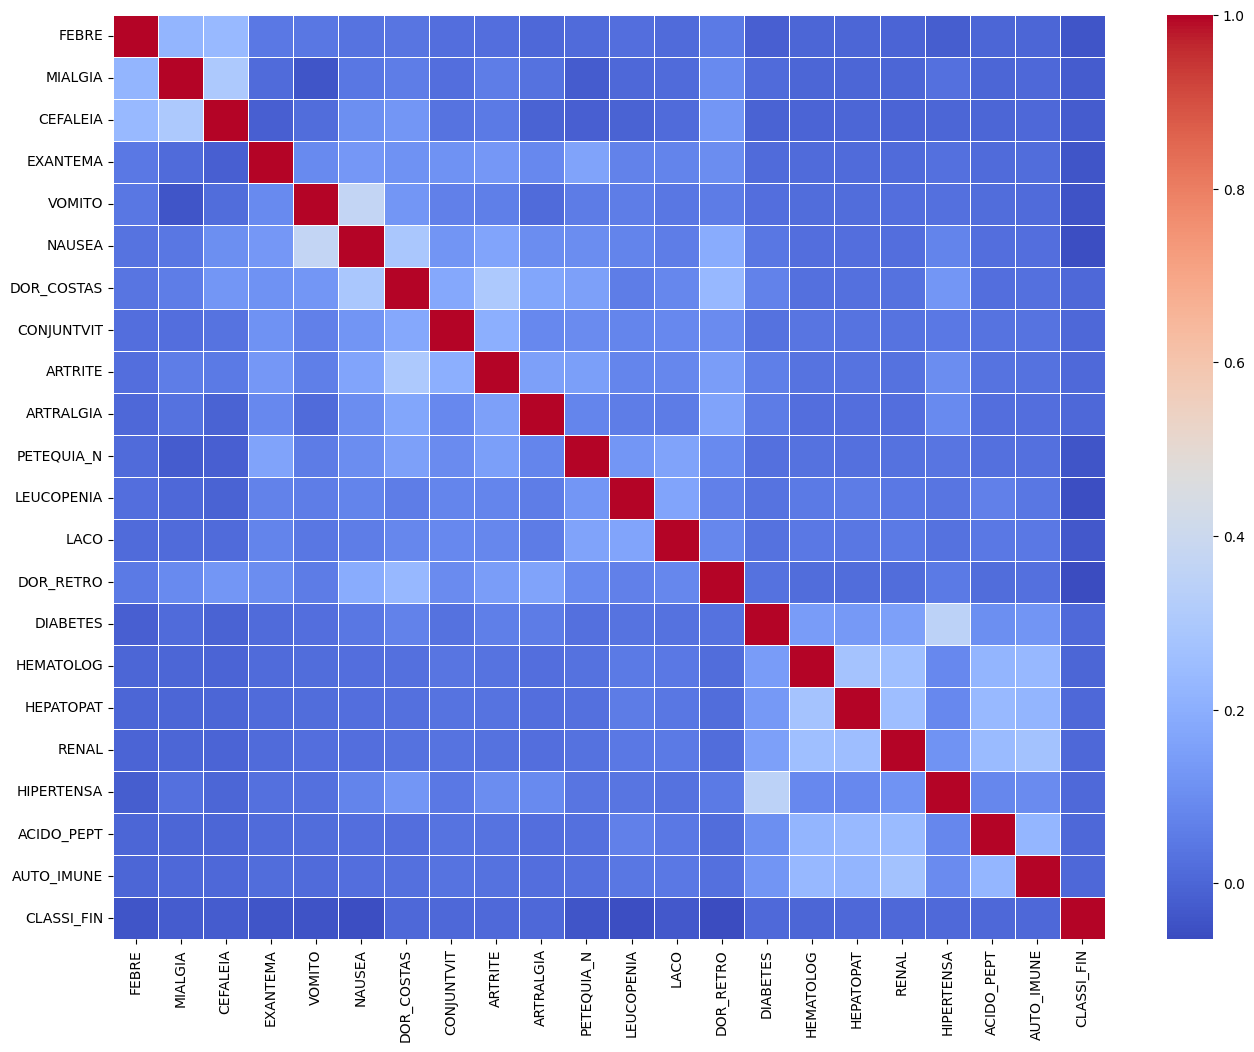

In [54]:
#GERAR GRAFICOS ENTENDER BALANCEAMENTO ANTES DE DIVIDIR - Rever flow (Balanceamento, correlação)
corr = novaBase2_1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)

<Axes: >

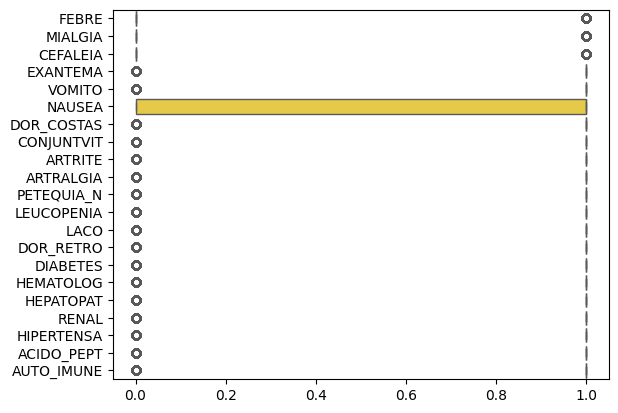

In [55]:
data = novaBase2_1.drop('CLASSI_FIN', axis=1)

sns.boxplot(data=data, orient="h", palette="Set2")

In [56]:
novaBase1.to_csv('basePreProcessada1.csv', index=False)
novaBase1_1.to_csv('basePreProcessada1_1.csv', index=False)
novaBase2.to_csv('basePreProcessada2.csv', index=False)
novaBase2_1.to_csv('basePreProcessada2_1.csv', index=False)
novaBase1Balanceada.to_csv('basePreProcessada1Balanceada.csv', index=False)
novaBase1_1Balanceada.to_csv('basePreProcessada1_1Balanceada.csv', index=False)
novaBase2Balanceada.to_csv('basePreProcessada2Balanceada.csv', index=False)
novaBase2_1Balanceada.to_csv('basePreProcessada2_1Balanceada.csv', index=False)
#novaBase3.to_csv('basePreProcessada3.csv', index=False)
#novaBase3_1.to_csv('basePreProcessada3_1.csv', index=False)